In [4]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

# Ejercicio 2

## 1

In [ ]:
def is_valid(count):
    for x in count:
        if x != 2:
            return False
    return True

In [5]:
def foo(n, i, res, out=None, count=None):    
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([x==2 for x in count]):
        res.append(out.copy())
    
    for j in range(1, n+1):
        if count[j-1] < 2:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [16]:
counts = []
for i in range(1, 6):
    res = handler(i)
    counts.append(len(res))

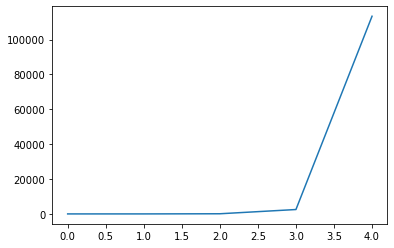

In [18]:
plt.plot(counts)

## 2

In [28]:
def foo(n, i, res, out=None, count=None):
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([j+1 == x for j, x in enumerate(count)]):
        res.append(out.copy())
        
    for j in range(1, n+1):
        if count[j-1] < j:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [31]:
handler(2)

[[1, 2, 2], [2, 1, 2], [2, 2, 1]]

## 3

In [6]:
def foo(n, i, res, out=None, count=None):    
    if out is None:
        out = []
    if count is None:
        count = [0] * n
        
    out.append(i)
    count[i-1] += 1
    
    if all([x<=2 for x in count]):
        res.append(out.copy())
    
    for j in range(1, n+1):
        if count[j-1] < 2:
            foo(n, j, res, out=out.copy(), count=count.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [7]:
handler(2)

[[1],
 [1, 1],
 [1, 1, 2],
 [1, 1, 2, 2],
 [1, 2],
 [1, 2, 1],
 [1, 2, 1, 2],
 [1, 2, 2],
 [1, 2, 2, 1],
 [2],
 [2, 1],
 [2, 1, 1],
 [2, 1, 1, 2],
 [2, 1, 2],
 [2, 1, 2, 1],
 [2, 2],
 [2, 2, 1],
 [2, 2, 1, 1]]

# Ejercicio 3

In [10]:
def is_valid(out, used):
    if not all(used):
        return False
    
    if len(out) <= 2 and all(used):
        return True
    
    for i in range(len(out)-2):
        for j in range(i+1, len(out)-1):
            for k in range(j+1, len(out)):
                if out[i] < out[j] < out[k]:
                    return False
    return True

def foo(n, i, res, out=None, used=None):
    if out is None:
        out = []
    if used is None:
        used = [False] * n
    
    out.append(i)
    used[i-1] = True
    
    if is_valid(out, used):
        res.append(out.copy())
        
    for j in range(1, n+1):
        if not used[j-1]:
            foo(n, j, res, out=out.copy(), used=used.copy())
            
def handler(n):
    res = []
    for i in range(1, n+1):
        foo(n, i, res)
    return res

In [11]:
counts = []
for i in range(1, 11):
    x = handler(i)
    counts.append(len(x))
counts

[1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796]

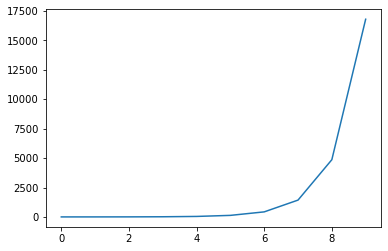

In [12]:
plt.plot(counts)

**Numeros de Catalan**

# Ejercicio 7

In [19]:
def trib(n, L):
    if len(L) <= n:
        diff = n - len(L) + 1
        for _ in range(diff):
            L.append(None)
            
    if L[n] is not None:
        return L[n]
    else:
        L[n] = trib(n-1, L) + trib(n-2, L) + trib(n-3, L)
        return L[n]

In [20]:
i = 0
L = [0, 0, 1]
while True:
    out = trib(i, L)
    if len(str(out)) == 100:
        break
    i += 1
out

1083489678390594838169695727189761003770564005347041320036550659232340355828621635463701423131151044

In [22]:
i = 0
flag = False
while True:
    if flag:
        break
    out = trib(i, L)
    
    count = [0] * 10
    for c in str(out):
        c = int(c)
        count[c] += 1
        if count[c] == 10:
            flag = True
    i += 1
out

12789542315272557225226295567482485993

# Ejemplos teorema maestro

## 1

$$
T(n) = T\left(\sqrt{n}\right) + n
$$

Haciendo $n=2^m$, tenemos:

$$
\begin{align}
    T(2^m) &= T\left(\sqrt{2^m}\right) + 2^m \\
    &= T\left(2^{m/2}\right) + 2^m
\end{align}
$$

Definiendo:

$$
S(m) = T(2^m)
$$

Sustituyendo en la ecuacin anterior:

$$
S(m) = S\left(\frac{m}{2}\right) + 2^m
$$

Calculando el exponente crítico:

$$
c_\text{crit} = \log_21 = 0
$$

Comparando con los casos listados [en Wikipedia](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)#Generic_form), vemos que este es el caso 3. Falta comprobar que se cumple la condición de regularidad. Como recordatorio, tenemos los siguientes parámetros:

$$
a=1,\qquad b=2,\qquad f(n) = 2^n
$$

Queremos ver si se cumple:

$$
a \cdot f\left(\frac{n}{b}\right) \leq k f(n)
$$

Para alguna $k<1$ y $n$ lo suficientemente grande. Es decir:

$$
1\cdot 2^{n/2} \leq k 2^n
$$

Simplificando, esto es equivalente a:

$$
k \geq \frac{1}{2^{n/2}}
$$

Es fácil ver que esto se cumple para prácticamente cualquier $k<1$. Por ejemplo, si $k=0.5$, para $n\geq 2$, esto es cierto.

Por lo tanto, cumple la condición de regularidad, de lo cual se sigue que:

$$
S(m) = \Theta\left(2^m\right)
$$

Es decir:

$$
T\left(2^m\right) = \Theta\left(2^m\right)
$$

Finalmente, sustituyendo $n=2^m$:

$$
T(n) = \Theta(n)
$$

## 2

$$
T(n) = T(n-1) + n
$$

Evaluando en $n-1$:

$$
T(n-1) = T(n-2) + (n-1)
$$

Sustituyendo en la primera ecuación:

$$
T(n) = T(n-2) + n + (n-1)
$$

Luego, evaluando la primera ecuación en $n-2$:

$$
T(n-2) = T(n-3) + (n-2)
$$

Sustituyendo en la ecuación anterior:

$$
T(n) = T(n-3) + n + (n-1) + (n-2)
$$

Podemos repetir este proceso $n$ veces, al final del cual obtendremos:

$$
T(n) = n + (n-1) + (n-2) + \cdots + 2 + 1
$$

De lo cual se sigue:

$$
T(n) = \Theta\left(n^2\right)
$$

## 3

$$
T(n) = 3\sqrt{n}T\left(\sqrt{n}\right) + \sqrt{n}\log n
$$

Hacemos $n=2^m$:

$$
\begin{align}
    T\left(2^m\right) &= 3 \sqrt{2^m} T\left(\sqrt{2^m}\right) + \sqrt{2^m} \log\left(2^m\right) \\
    &= 3 \cdot 2^{m/2} T\left(2^{m/2}\right) + 2^{m/2}m\log{2}
\end{align}
$$

Dividiendo ambos lados por $2^{m}$:

$$
\frac{T\left(2^m\right)}{2^{m}} = 3\frac{T\left(2^{m/2}\right)}{2^{m/2}} + \frac{m\log{2}}{2^{m/2}}
$$

Definiendo $S(m) = \frac{T\left(2^m\right)}{2^m}$:

$$
S(m) = 3 S\left(\frac{m}{2}\right) + \frac{m\log{2}}{2^{m/2}}
$$

Calculando el exponente crítico:

$$
c_\text{crit} = \log_23 \approx 1.58
$$

Tenemos la función:

$$
f(n) = \frac{n\log{2}}{2^{n/2}}
$$

Es fácil ver que:

$$
\lim_{n\rightarrow\infty} f(n)= 0
$$

Por lo tanto:

$$
\lim_{n\rightarrow\infty} \frac{f(n)}{n}= 0
$$

Pero por el criterio del límite, esto es equivalente a:

$$
f(n) = O(n)
$$

Es decir, tenemos el primer caso de la [tabla de Wikipedia](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)#Generic_form), de lo cual se sigue que:

$$
S(m) = \Theta\left(m^{\log_23}\right)
$$

Sustituyendo de regreso:

$$
\frac{T\left(2^m\right)}{2^m} = \Theta\left(m^{\log_23}\right)
$$

$$
T\left(2^m\right) = \Theta\left(2^mm^{\log_23}\right)
$$

$$
T(n) = \Theta\left[n\left(\log_2n\right)^{\log_23}\right]
$$